# 01 - Curve Fitting: The Method of Least Squares

---

## 1. Introduction

In many scientific and engineering problems, we are given a set of data points $(x_i, f(x_i))$ that come from measurements. Unlike in interpolation (where we must pass through every point), we assume that this data has **errors** or **noise**. 

Our goal is not to find a complex function that passes through every noisy point, but rather to find a **simple function** $g(x)$ that **best approximates** the underlying trend of the data. 

The **Method of Least Squares** is the most common technique for finding this "best fit". The core idea is to find the function $g(x)$ that minimizes the sum of the squares of the errors between the function and the data points.

This notebook focuses on the simplest case: fitting data to a straight line, also known as **Linear Regression**.

## 2. The Linear Case: $g(x) = c_0 + c_1x$

Let's assume our underlying function is a straight line, $g(x) = c_0 + c_1x$. We need to find the coefficients $c_0$ (the y-intercept) and $c_1$ (the slope) that best fit our $m$ data points $(x_1, f_1), (x_2, f_2), \ldots, (x_m, f_m)$.

First, we define the **residual** (or error) for each point $i$ as the vertical distance between the data point and the line:
$$ r_i = f_i - g(x_i) = f_i - (c_0 + c_1x_i) $$

To find the best line, we want to minimize the total error. We do this by minimizing the **Sum of Squared Residuals (SSR)**, $S$:
$$ S(c_0, c_1) = \sum_{i=1}^{m} r_i^2 = \sum_{i=1}^{m} [f_i - (c_0 + c_1x_i)]^2 $$

This is now an optimization problem. To find the minimum, we take the partial derivatives of $S$ with respect to our unknown parameters, $c_0$ and $c_1$, and set them to zero.

**1. Partial derivative with respect to $c_0$:**
$$ \frac{\partial S}{\partial c_0} = \sum_{i=1}^{m} 2[f_i - c_0 - c_1x_i] \cdot (-1) = 0 $$
$$ \sum_{i=1}^{m} (f_i - c_0 - c_1x_i) = 0 \implies \sum_{i=1}^{m} f_i - \sum_{i=1}^{m} c_0 - \sum_{i=1}^{m} c_1x_i = 0 $$
$$ \left( \sum_{i=1}^{m} 1 \right) c_0 + \left( \sum_{i=1}^{m} x_i \right) c_1 = \sum_{i=1}^{m} f_i $$

**2. Partial derivative with respect to $c_1$:**
$$ \frac{\partial S}{\partial c_1} = \sum_{i=1}^{m} 2[f_i - c_0 - c_1x_i] \cdot (-x_i) = 0 $$
$$ \sum_{i=1}^{m} (f_ix_i - c_0x_i - c_1x_i^2) = 0 \implies \sum_{i=1}^{m} f_ix_i - \sum_{i=1}^{m} c_0x_i - \sum_{i=1}^{m} c_1x_i^2 = 0 $$
$$ \left( \sum_{i=1}^{m} x_i \right) c_0 + \left( \sum_{i=1}^{m} x_i^2 \right) c_1 = \sum_{i=1}^{m} f_ix_i $$

This gives us a $2 \times 2$ linear system for the unknown coefficients $c_0$ and $c_1$. These are known as the **Normal Equations**.

## 3. The Normal Equations (Linear Case)

To find the best-fit line $g(x) = c_0 + c_1x$, we must solve the following system for $c_0$ and $c_1$:

$$ 
\begin{pmatrix}
m & \sum x_i \\
\sum x_i & \sum x_i^2
\end{pmatrix}
\begin{pmatrix} c_0 \\ c_1 \end{pmatrix} = 
\begin{pmatrix} \sum f_i \\ \sum x_if_i \end{pmatrix}
$$

Where $m$ is the total number of data points.

## 4. Example

Given the following data table, approximate $f(x)$ by a linear polynomial $g(x) = c_0 + c_1x$ using the Method of Least Squares.

| $x_i$ | 0 | 0.25 | 0.5 | 0.75 | 1.0 |
|---|---|---|---|---|---|
| $f(x_i)$ | 1 | 1.284 | 1.6487 | 2.117 | 2.7183 |


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. The "Manual" Way (Building the Normal Equations) ---

# Our data
x_i = np.array([0, 0.25, 0.5, 0.75, 1.0])
f_i = np.array([1, 1.284, 1.6487, 2.117, 2.7183])

# Calculate the required sums
m = len(x_i)
sum_x = np.sum(x_i)
sum_f = np.sum(f_i)
sum_x2 = np.sum(x_i**2)
sum_xf = np.sum(x_i * f_i)

print(f"m = {m}")
print(f"Sum(x) = {sum_x:.4f}")
print(f"Sum(f) = {sum_f:.4f}")
print(f"Sum(x^2) = {sum_x2:.4f}")
print(f"Sum(xf) = {sum_xf:.4f}")

# Build the linear system A * c = b
A = np.array([
    [m, sum_x],
    [sum_x, sum_x2]
])

b = np.array([sum_f, sum_xf])

print("\nNormal Equations Matrix (A):\n", A)
print("Normal Equations Vector (b):\n", b)

# Solve the system for the coefficients c = [c0, c1]
c = np.linalg.solve(A, b)
c0, c1 = c[0], c[1]

print(f"\nCoefficients (Manual): c0 = {c0:.4f}, c1 = {c1:.4f}")


m = 5
Sum(x) = 2.5000
Sum(f) = 8.7680
Sum(x^2) = 1.8750
Sum(xf) = 5.4514

Normal Equations Matrix (A):
 [[5.    2.5  ]
 [2.5   1.875]]
Normal Equations Vector (b):
 [8.768  5.4514]

Coefficients (Manual): c0 = 0.8997, c1 = 1.7078


## 5. The Easy Way (Using `numpy.polyfit`)

For polynomial fitting, NumPy provides the `polyfit` function, which performs all these steps automatically.

`np.polyfit(x, y, deg)`

- `x`: array of x-coordinates
- `y`: array of y-coordinates
- `deg`: degree of the polynomial to fit (for a line, `deg=1`)

Coefficients (polyfit): c0 = 0.8997, c1 = 1.7078


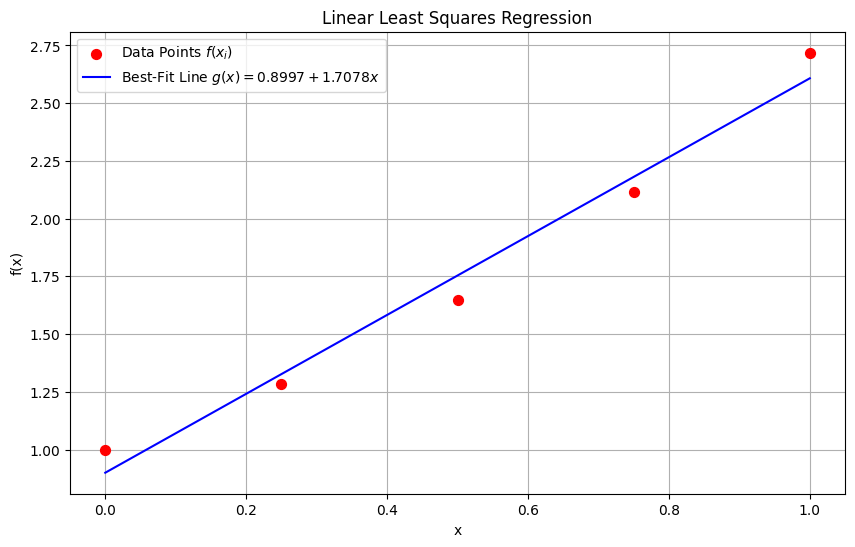

In [2]:
# The easy way: np.polyfit(x, y, degree)
# Note: polyfit returns coefficients from highest power (c1) to lowest (c0)
c_polyfit = np.polyfit(x_i, f_i, 1)
c1_easy, c0_easy = c_polyfit[0], c_polyfit[1]

print(f"Coefficients (polyfit): c0 = {c0_easy:.4f}, c1 = {c1_easy:.4f}")

# --- 6. Visualization ---

# Create the approximation function g(x)
g = lambda x: c0 + c1 * x

# Generate points for the best-fit line
x_line = np.linspace(min(x_i), max(x_i), 100)
f_line = g(x_line)

plt.figure(figsize=(10, 6))
plt.scatter(x_i, f_i, color='red', s=50, zorder=5, label='Data Points $f(x_i)$')
plt.plot(x_line, f_line, color='blue', label=f'Best-Fit Line $g(x) = {c0:.4f} + {c1:.4f}x$')
plt.title('Linear Least Squares Regression')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()